<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day1_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
feature_names = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [5]:
class_names = penguins['species'].unique()
class_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
X = penguins[feature_names]
Y = penguins['species']

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

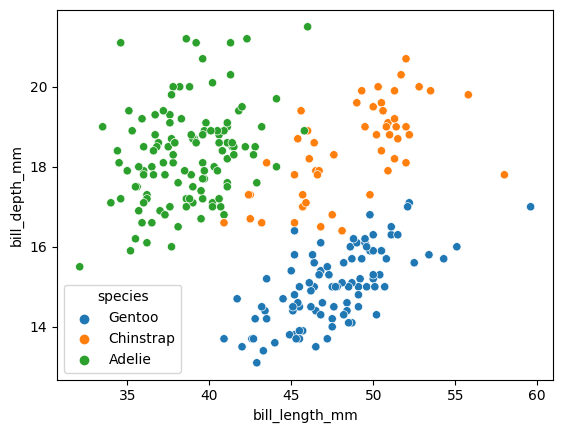

In [8]:
import matplotlib.pyplot as plt

sns.scatterplot(x_train, x=feature_names[0], y=feature_names[1], hue=y_train)

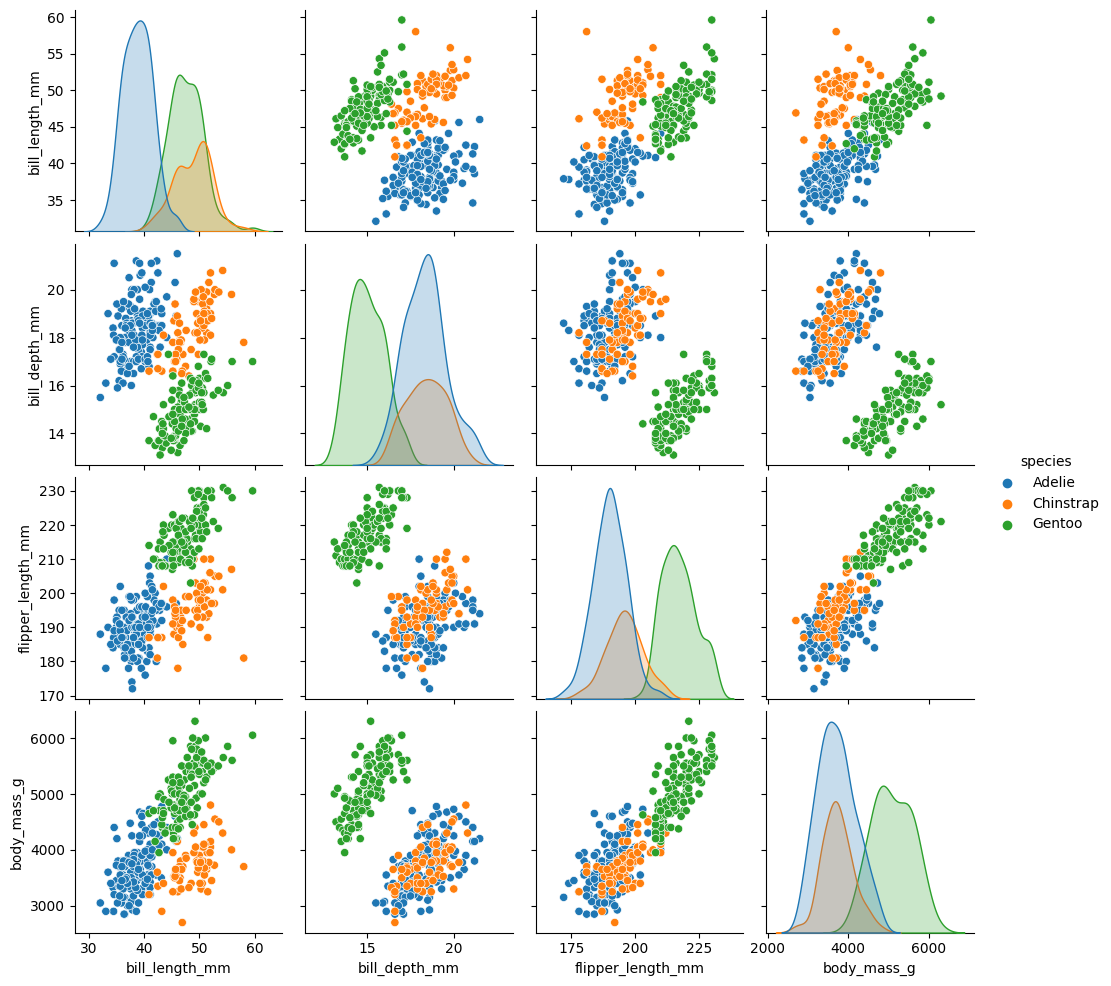

In [9]:
# Finding which features in our datasets allow us to best discriminate between the different species.
# Key step in feature selection.
sns.pairplot(penguins, hue='species')

In [10]:
#  Use a decision tree model to classify the different species based on our data.
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
clf.predict(x_test)

array(['Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap'], dtype=object)

In [12]:
# Find out the accuracy of our classification model
clf_score = clf.score(x_test, y_test)
clf_score

0.9552238805970149

[Text(0.5769230769230769, 0.9285714285714286, 'flipper_length_mm <= 207.5\ngini = 0.633\nsamples = 266\nvalue = [118, 51, 97]\nclass = Adelie'),
 Text(0.38461538461538464, 0.7857142857142857, 'bill_length_mm <= 42.35\ngini = 0.42\nsamples = 166\nvalue = [117, 48, 1]\nclass = Adelie'),
 Text(0.23076923076923078, 0.6428571428571429, 'bill_depth_mm <= 16.65\ngini = 0.018\nsamples = 111\nvalue = [110, 1, 0]\nclass = Adelie'),
 Text(0.15384615384615385, 0.5, 'bill_length_mm <= 39.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]\nclass = Adelie'),
 Text(0.07692307692307693, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = Adelie'),
 Text(0.23076923076923078, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.3076923076923077, 0.5, 'gini = 0.0\nsamples = 102\nvalue = [102, 0, 0]\nclass = Adelie'),
 Text(0.5384615384615384, 0.6428571428571429, 'body_mass_g <= 4062.5\ngini = 0.253\nsamples = 55\nvalue = [7, 47, 1]\nclass = Chin

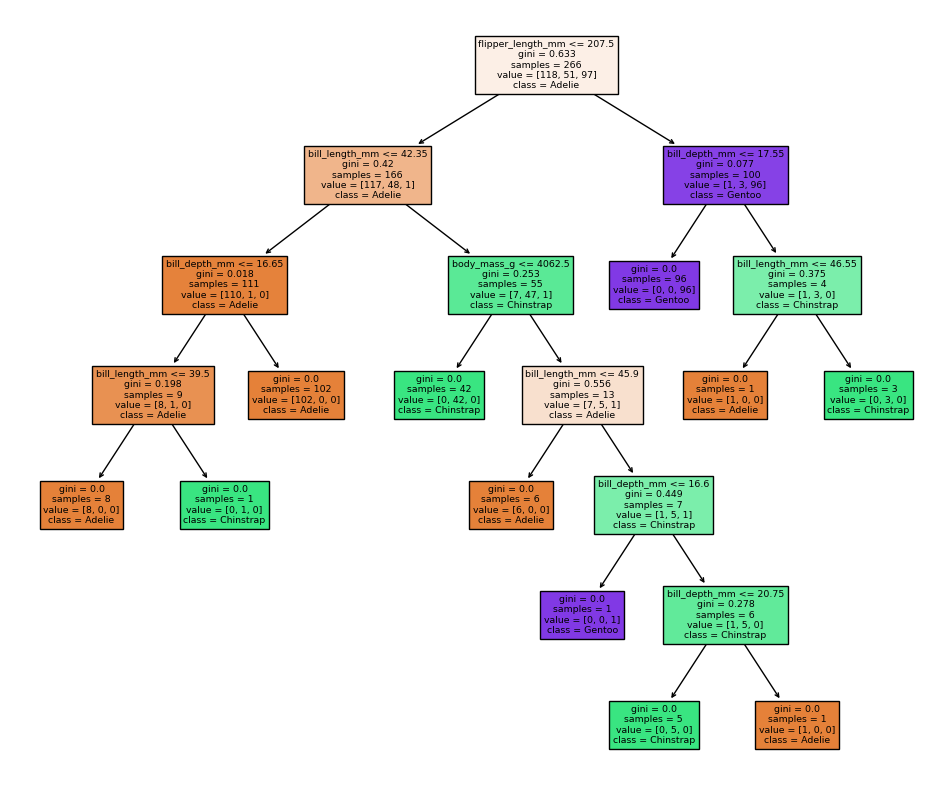

In [13]:
# Plot our decision tree
fig = plt.figure(figsize=(12,10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

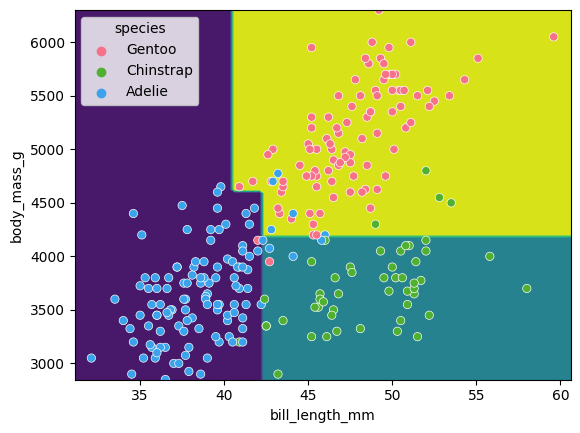

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

f1 = feature_names[0]
f2 = feature_names[3]

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, x_train[[f1, f2]])

sns.scatterplot(x_train, x=f1, y=f2, hue=y_train, palette='husl')

In [15]:
x_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
306,43.4,14.4,218.0,4600.0
168,50.3,20.0,197.0,3300.0
181,52.8,20.0,205.0,4550.0
167,50.5,19.6,201.0,4050.0
19,46.0,21.5,194.0,4200.0


**Looking at a different classification algorithm: Support Vector Machine**

In [16]:
from sklearn import preprocessing
import pandas as pd

# Normalise data with different magnitudes so that it has mean of 0 and variance of 1 (without this step - SVM only looks at data with greatest variance)
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

In [17]:
from sklearn import svm

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(x_train_scaled, y_train)
svm_score = SVM.score(x_test_scaled, y_test)

print("Decision tree: ", clf_score)
print("SVM score: ", svm_score)

Decision tree:  0.9552238805970149
SVM score:  0.9701492537313433


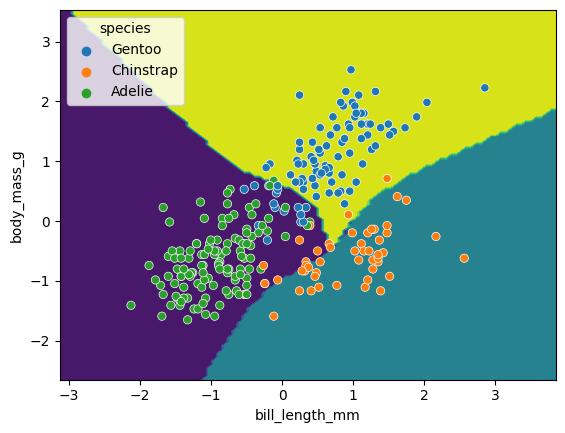

In [18]:
x2 = x_train_scaled[[f1, f2]]

SVM = svm.SVC(kernel='poly', degree=3, C=1.5)
SVM.fit(x2, y_train)

DecisionBoundaryDisplay.from_estimator(SVM, x2) #, ax=ax
sns.scatterplot(x2, x=f1, y=f2, hue=y_train)
plt.show()

In [19]:
# import sklearn
# sklearn.utils.check_random_state()
# np.random.get_state(seed)

In [21]:
# We can limit the decision tree overfitting by reducing max_depth: less decisions to make a classification --> simpler decision space
max_depths = [1, 2, 3, 4, 5]

accuracy = []
for i, d in enumerate(max_depths):
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(x_train, y_train)
  acc = clf.score(x_test, y_test)
  accuracy.append((d, acc))

acc_df = pd.DataFrame(accuracy, columns=['depth', 'accuracy'])

Text(0, 0.5, 'Accuracy')

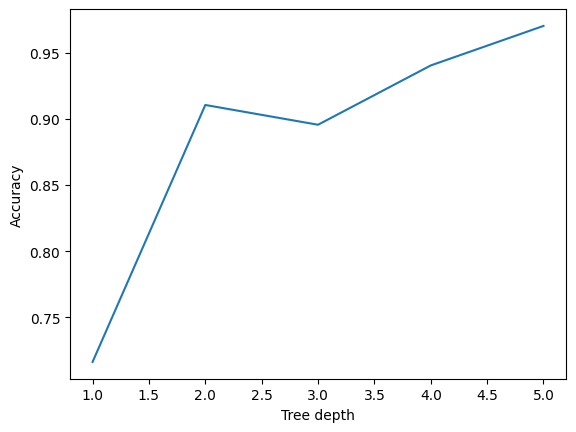

In [22]:
sns.lineplot(acc_df, x='depth', y='accuracy')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')

[Text(0.5, 0.8333333333333334, 'flipper_length_mm <= 207.5\ngini = 0.633\nsamples = 266\nvalue = [118, 51, 97]\nclass = Adelie'),
 Text(0.25, 0.5, 'bill_length_mm <= 42.35\ngini = 0.42\nsamples = 166\nvalue = [117, 48, 1]\nclass = Adelie'),
 Text(0.125, 0.16666666666666666, 'gini = 0.018\nsamples = 111\nvalue = [110, 1, 0]\nclass = Adelie'),
 Text(0.375, 0.16666666666666666, 'gini = 0.253\nsamples = 55\nvalue = [7, 47, 1]\nclass = Chinstrap'),
 Text(0.75, 0.5, 'bill_depth_mm <= 17.55\ngini = 0.077\nsamples = 100\nvalue = [1, 3, 96]\nclass = Gentoo'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [1, 3, 0]\nclass = Chinstrap')]

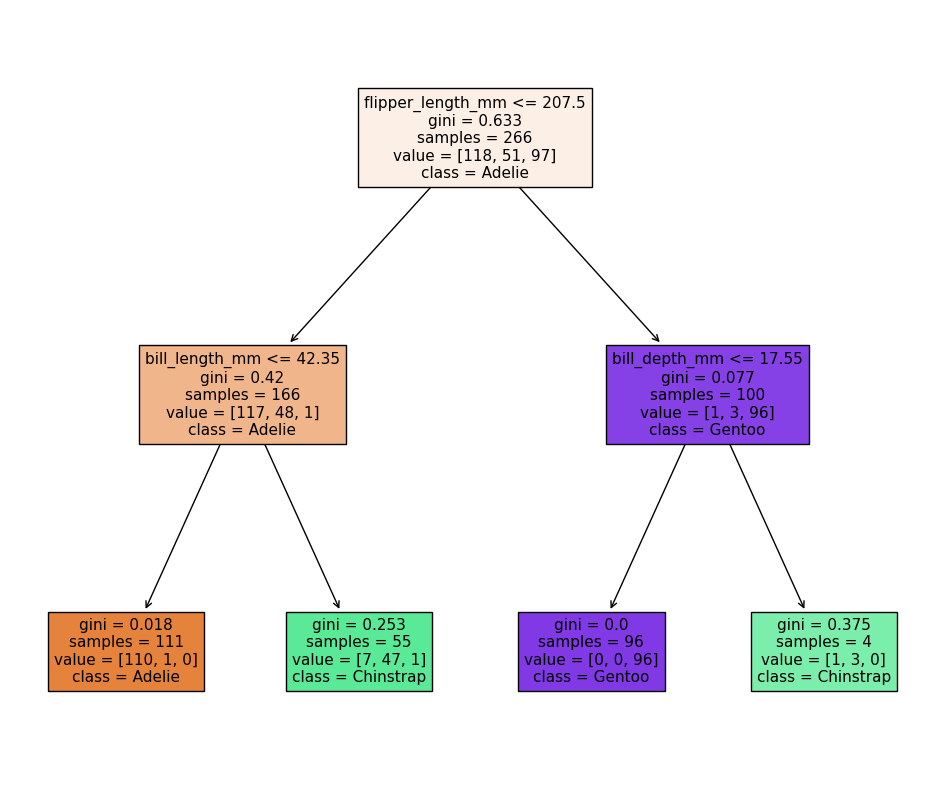

In [26]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

fig = plt.figure(figsize=(12, 10))
plot_tree(clf, class_names=class_names, feature_names=feature_names, filled=True, ax=fig.gca())

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

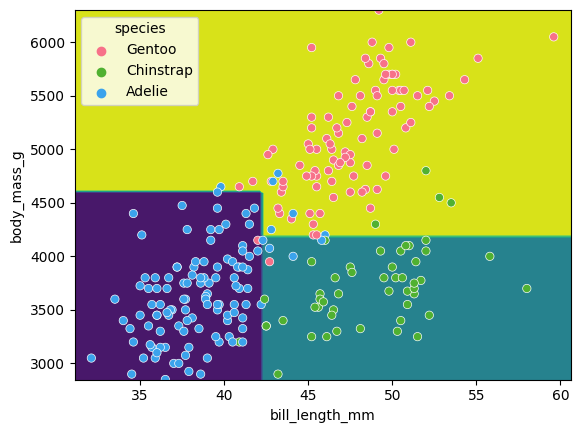

In [28]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train[[f1, f2]], y_train)

d = DecisionBoundaryDisplay.from_estimator(clf, x_train[[f1, f2]])

sns.scatterplot(x_train, x=f1, y=f2, hue=y_train, palette='husl')